# SECTION 1

# CROP RECOMMENDATION

In [ ]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
crop = pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
crop.shape


(2200, 8)

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# Data Preprocessing

In [ ]:
# Checking missing values of the dataset in each column
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
# Dropping missing values
crop = crop.dropna()
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
#checking
crop.isnull().values.any()

False

# Exploratory Data Analysis
1) The Temperatures mostly ranged from 15 to 35, which means that most of the plants in the project need at least a high or medium temperature. The cotton plant is sensitive to heat and cannot bear less than 15 degrees Celsius as it is clear.

2) The Optimum pH for most plants is between 5.5 and 8 , depending on the type of plant

3) The Rainfall rates ranged mostly from 50 mm to 150 mm, and this is considered to be a very large amount of rain, but there are some plants in the project that need that, The Rainfall here is considered a winter asset, as it works to wash away rust in wheat and remove all germs from the plant. Rain increases the efficiency of representation by washing leaves and improving the growth of spikes.

4) As shown in the figure, most of the plants in the project need large amounts of water, and there are some plants that need small amounts of water, and it is important not to give too little or too much water. Giving too little water will cause the leaves to droop, and too much water will cause the roots to rot.

5) As shown in the figure, plants that need high or low temperatures, and this is an important point in determining when to plant a plant.

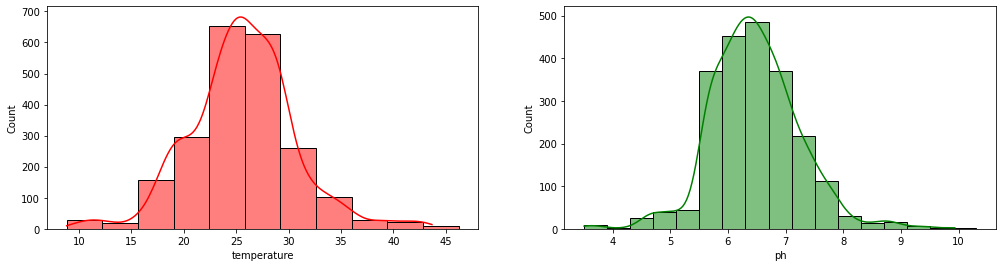

In [ ]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(crop.temperature ,binwidth=3.4 , color="red" , kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(crop.ph ,binwidth=0.4 ,color = "green", kde={'alpha':0.5})
plt.show()

<AxesSubplot:xlabel='humidity', ylabel='Count'>

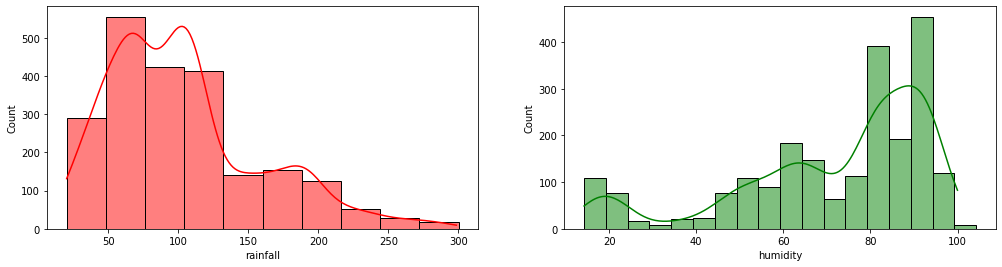

In [ ]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(crop.rainfall ,  binwidth=28 ,color="red" , kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(crop.humidity ,  binwidth=5 ,color="green" , kde={'alpha':0.5})

In [ ]:
#Checking the Statistics for all the crops
print("Average Ratio of nitrogen in the soil : {0: .2f}".format(crop['N'].mean()))
print("Average Ratio of Phosphorous in the soil : {0: .2f}".format(crop['P'].mean()))
print("Average Ratio of Potassium in the soil : {0: .2f}".format(crop['K'].mean()))
print("Average temperature in Celsius : {0: .2f}".format(crop['temperature'].mean()))
print("Average Relative Humidity in % is : {0: .2f}".format(crop['humidity'].mean()))
print("Average pH value of the soil : {0: .2f}".format(crop['ph'].mean()))
print("Average Rain fall in mm : {0: .2f}".format(crop['rainfall'].mean()))

Average Ratio of nitrogen in the soil :  50.55
Average Ratio of Phosphorous in the soil :  53.36
Average Ratio of Potassium in the soil :  48.15
Average temperature in Celsius :  25.62
Average Relative Humidity in % is :  71.48
Average pH value of the soil :  6.47
Average Rain fall in mm :  103.46


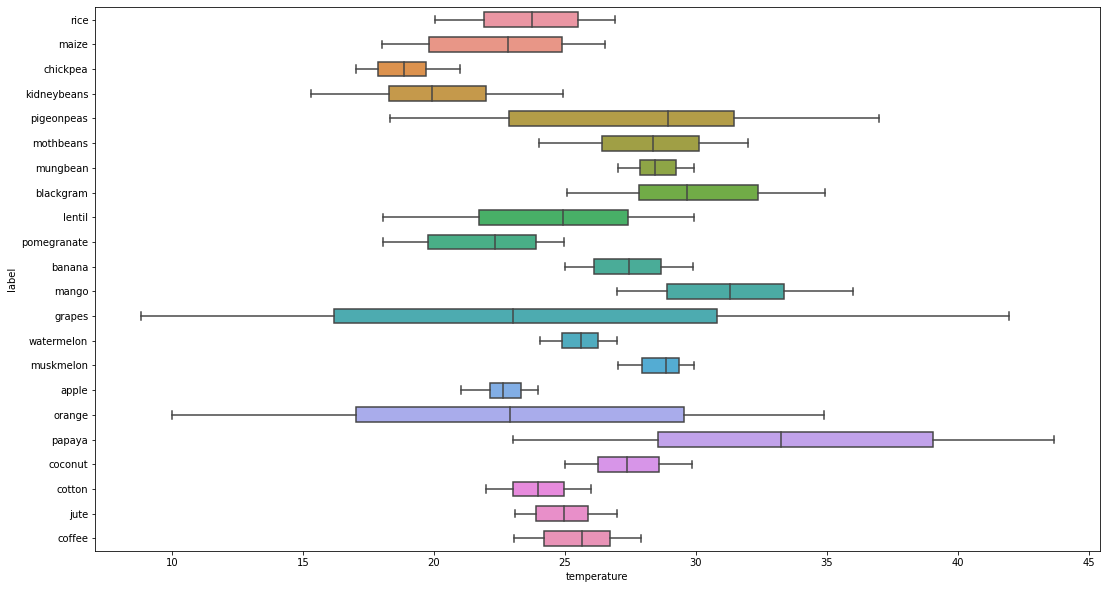

In [ ]:
# As shown in the figure, plants that need high or low temperatures, and this is an important point in determining when to plant a plant.
plt.figure(figsize=(18,10))
sns.boxplot(x="temperature", y="label", data=crop,
            whis=[0, 100], width=.6 , orient="h")
plt.show()

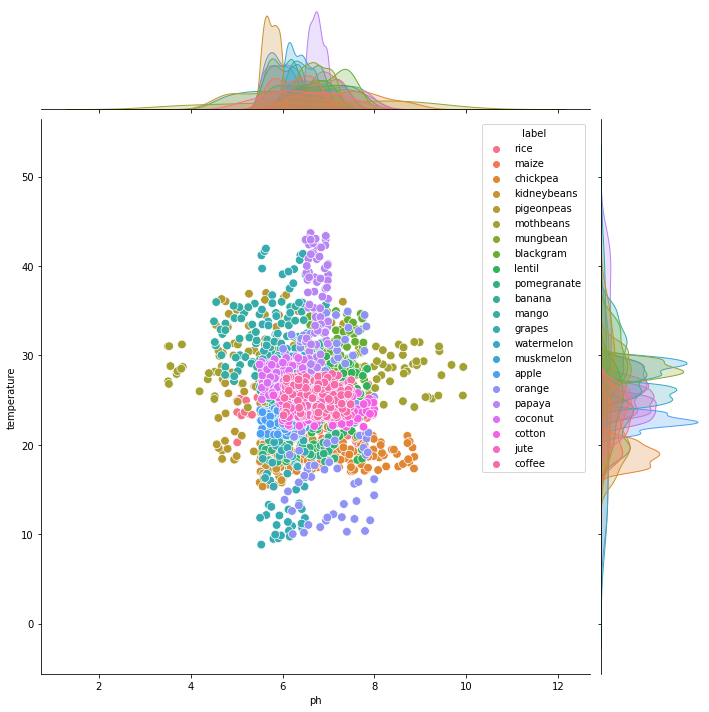

In [ ]:
# In general, when the temperature rises above 21 pH decrease
# The Optimum pH for most plants is between 5.5 and 8 , depending on the type of plant
sns.jointplot(data=crop, x="ph", y="temperature" ,height=10 ,hue="label" , space=0.1 ,s=75 )
plt.show()

In [ ]:
# for interactivity
import ipywidgets
from ipywidgets import interact

In [ ]:
@interact
def summary(crops = list(crop['label'].value_counts().index)):
    x = crop[crop['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max())
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max())
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max())
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

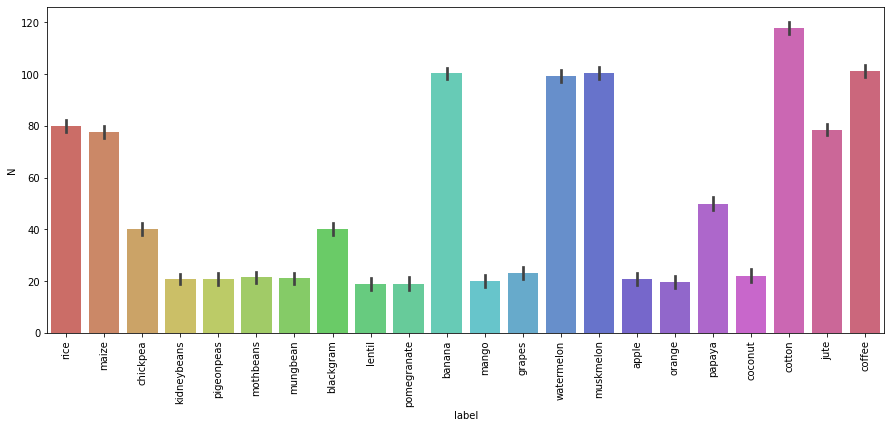

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'N', x = 'label', data=crop, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

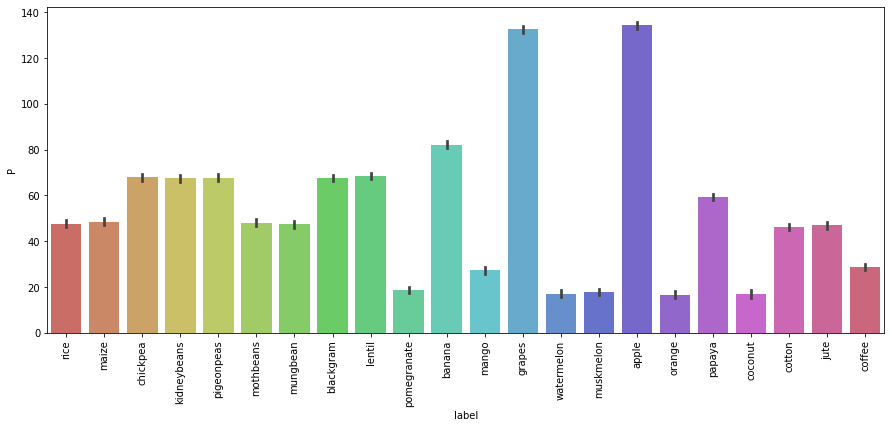

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'P', x = 'label', data=crop, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

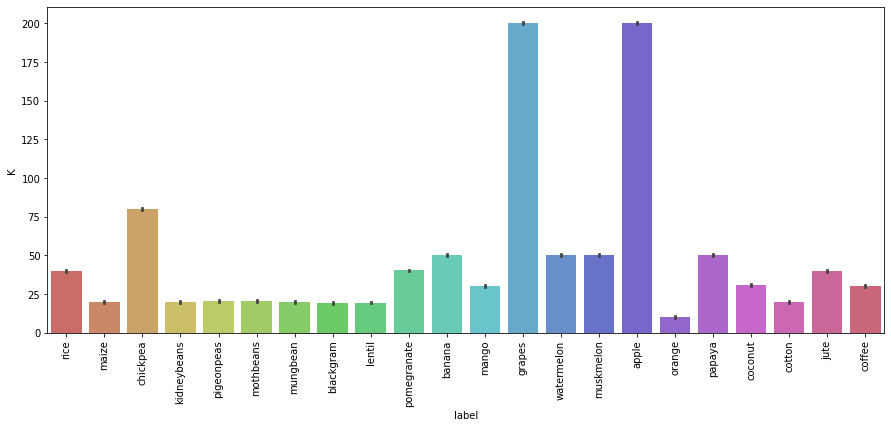

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'K', x = 'label', data=crop, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

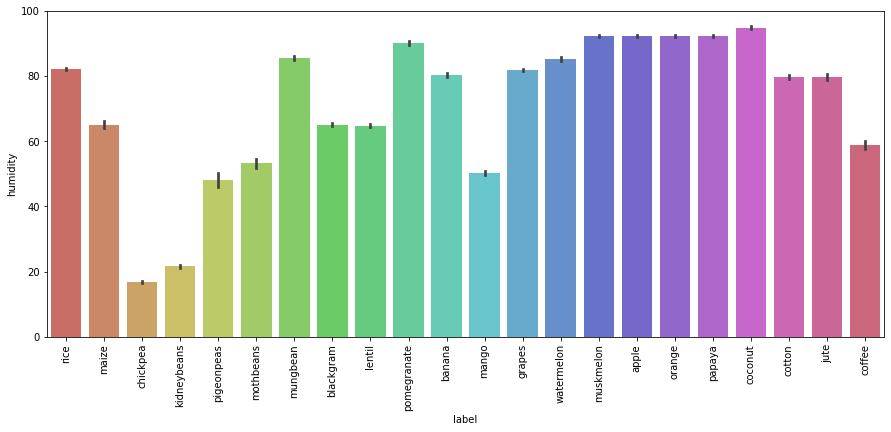

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'humidity', x = 'label', data=crop, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

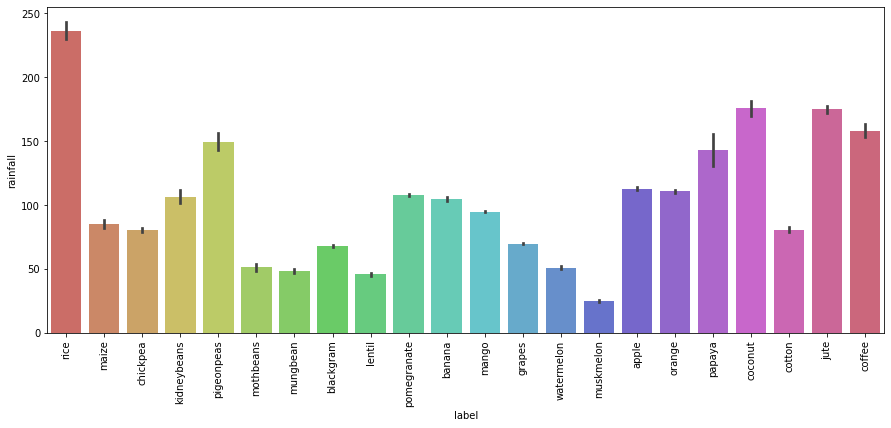

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'rainfall', x = 'label', data=crop, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

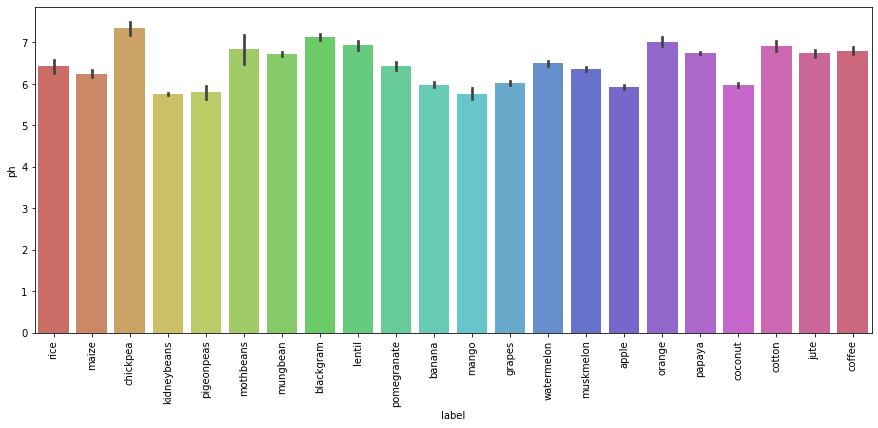

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'ph', x = 'label', data=crop, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

# which crops can only be Grown ........

In [ ]:
### Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season

print("Summer Crops")
print(crop[(crop['temperature'] > 30) & (crop['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(crop[(crop['temperature'] < 20) & (crop['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(crop[(crop['rainfall'] > 200) & (crop['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


<AxesSubplot:>

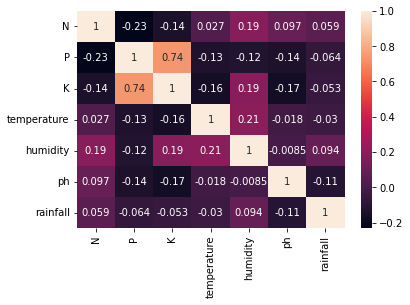

In [ ]:
sns.heatmap(crop.corr(),annot=True)

In [ ]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = crop['label']

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# DEISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [ ]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

# Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [ ]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)

In [ ]:
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

SVM (SUPPORT VECTOR )

In [ ]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [ ]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

# XGB

In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.93      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

In [ ]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.98636364, 0.99318182, 0.99545455, 0.99090909, 0.98409091])

# Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

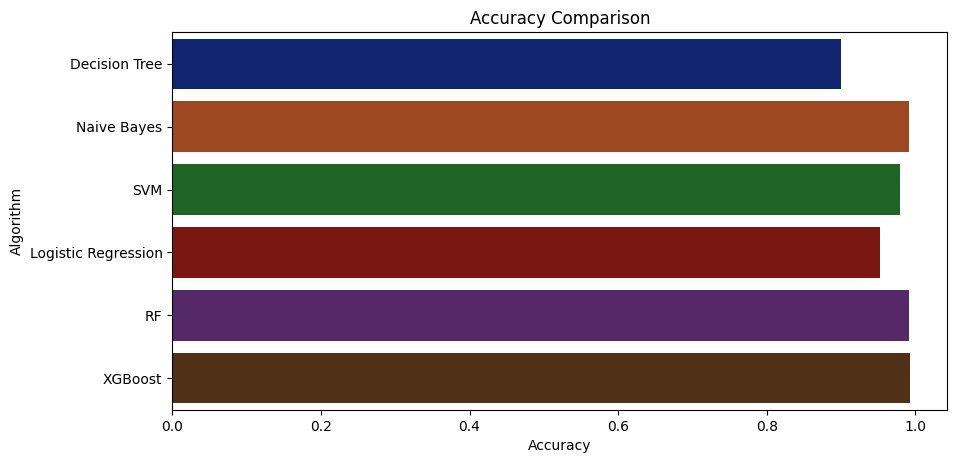

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.9795454545454545
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091
XGBoost --> 0.9931818181818182


In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [ ]:

data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


# SECTION 2

# Crop-Yield-Prediction

In [ ]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the dataset

crop=pd.read_csv("crop_production.csv")
crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [ ]:
crop.shape

#rows X columns

(246091, 7)

In [ ]:
# dataset columns
crop.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
# statistical inference of the dataset

crop.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [ ]:
# viewing unique crops available in the dataset

print(crop['Crop'].unique())

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'Barley' 'Khesari' 'Guar seed' 'Moth'


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
# Checking missing values of the dataset in each column
crop.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [ ]:
# Dropping missing values
crop = crop.dropna()
crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [ ]:
#checking
crop.isnull().values.any()

False

In [ ]:
# Adding a new column Yield which indicates Production per unit Area.

crop['Yield'] = (crop['Production'] / crop['Area'])
crop.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0,4.225000


# Visualizing the dataset :

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

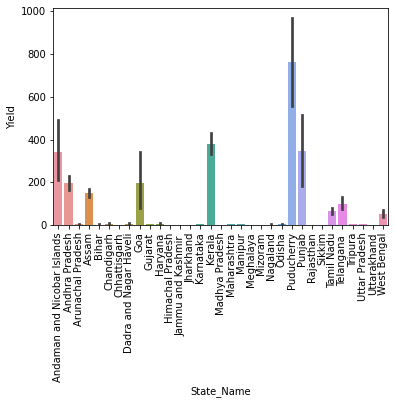

In [ ]:
sns.barplot(crop["State_Name"], crop["Yield"])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

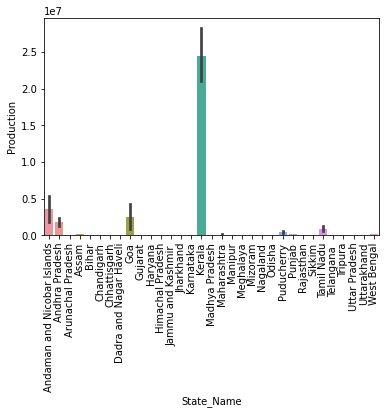

In [ ]:
sns.barplot(crop["State_Name"], crop["Production"])
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

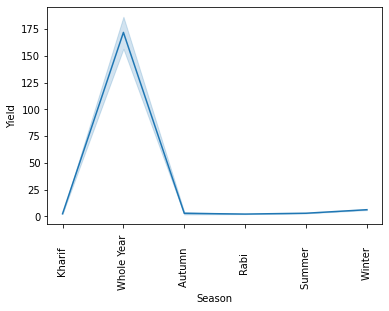

In [ ]:
sns.lineplot(crop["Season"], crop["Yield"])
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

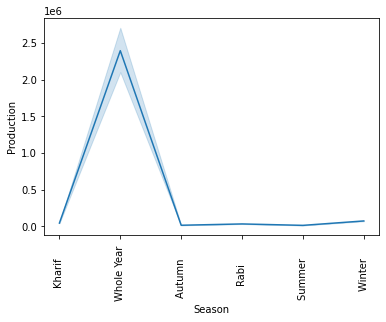

In [ ]:
sns.lineplot(crop["Season"], crop["Production"])
plt.xticks(rotation = 90)

# Analyzing each type of Crop

# 1. RICE

In [ ]:
rice_data = crop[crop["Crop"]=="Rice"]
rice_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,3.147059
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,3.614458
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,2.700000
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,1.734038
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,1.370797
...,...,...,...,...,...,...,...,...
246049,West Bengal,PURULIA,2013,Summer,Rice,516.00,1274.00,2.468992
246052,West Bengal,PURULIA,2013,Winter,Rice,302274.00,730136.00,2.415477
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.00,721.00,2.731061
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00,2.617647


In [ ]:
rice_data.shape

(15082, 8)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Kharif     '),
  Text(1, 0, 'Autumn     '),
  Text(2, 0, 'Rabi       '),
  Text(3, 0, 'Whole Year '),
  Text(4, 0, 'Summer     '),
  Text(5, 0, 'Winter     ')])

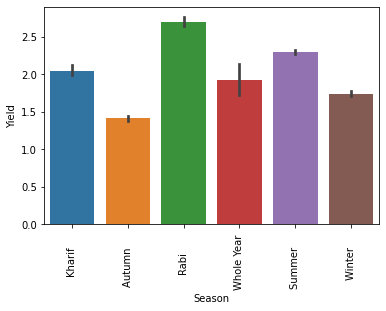

In [ ]:
sns.barplot("Season","Yield",data = rice_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

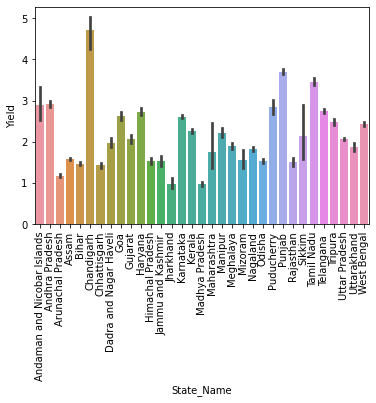

In [ ]:
sns.barplot("State_Name","Yield",data=rice_data)
plt.xticks(rotation=90)

(array([    0.,  5000., 10000.]), [])

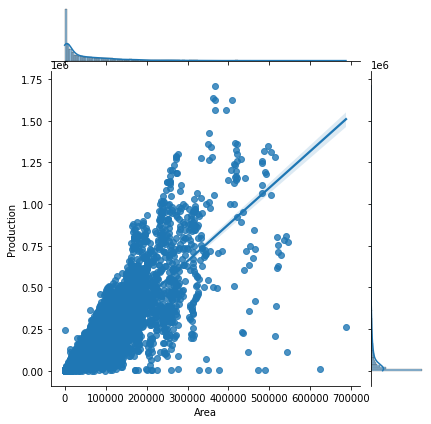

In [ ]:
sns.jointplot("Area","Production",data=rice_data,kind="reg")
plt.xticks(rotation=90)

Observations :

Rice yield is maximum in Rabi season.

Rice yield is maximum in Chandigarh

# 2.WHEAT

In [ ]:
wheat_data = crop[crop["Crop"]=="Wheat"]
wheat_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
230,Andhra Pradesh,ANANTAPUR,1997,Rabi,Wheat,300.0,200.0,0.666667
255,Andhra Pradesh,ANANTAPUR,1998,Rabi,Wheat,400.0,200.0,0.500000
284,Andhra Pradesh,ANANTAPUR,1999,Rabi,Wheat,439.0,294.0,0.669704
326,Andhra Pradesh,ANANTAPUR,2000,Rabi,Wheat,520.0,297.0,0.571154
372,Andhra Pradesh,ANANTAPUR,2001,Rabi,Wheat,307.0,213.0,0.693811
...,...,...,...,...,...,...,...,...
245949,West Bengal,PURULIA,2010,Rabi,Wheat,2013.0,5152.0,2.559364
245980,West Bengal,PURULIA,2011,Rabi,Wheat,1880.0,4206.0,2.237234
246012,West Bengal,PURULIA,2012,Rabi,Wheat,1648.0,3310.0,2.008495
246047,West Bengal,PURULIA,2013,Rabi,Wheat,1187.0,2675.0,2.253580


<AxesSubplot:xlabel='Season', ylabel='Yield'>

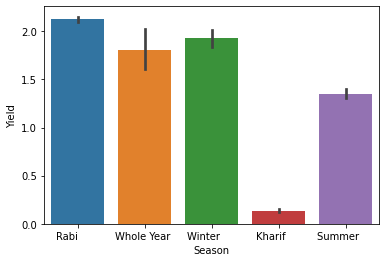

In [ ]:
sns.barplot("Season","Yield",data = wheat_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Arunachal Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Dadra and Nagar Haveli'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Himachal Pradesh'),
  Text(10, 0, 'Jammu and Kashmir '),
  Text(11, 0, 'Jharkhand'),
  Text(12, 0, 'Karnataka'),
  Text(13, 0, 'Kerala'),
  Text(14, 0, 'Madhya Pradesh'),
  Text(15, 0, 'Maharashtra'),
  Text(16, 0, 'Meghalaya'),
  Text(17, 0, 'Mizoram'),
  Text(18, 0, 'Nagaland'),
  Text(19, 0, 'Odisha'),
  Text(20, 0, 'Punjab'),
  Text(21, 0, 'Rajasthan'),
  Text(22, 0, 'Sikkim'),
  Text(23, 0, 'Tamil Nadu'),
  Text(24, 0, 'Telangana '),
  Text(25, 0, 'Tripura'),
  Text(26, 0, 'Uttar Pradesh'),
  Text(27, 0, 'Uttarakhand'),
  Text(28, 0, 'West Bengal')])

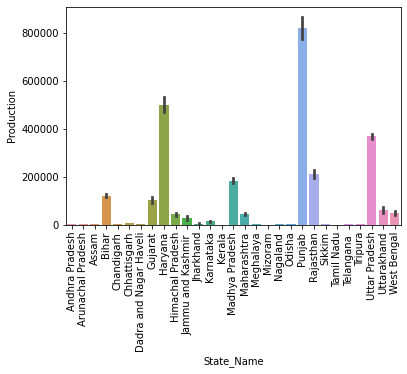

In [ ]:
sns.barplot("State_Name","Production",data = wheat_data)
plt.xticks(rotation = 90)

(array([   0., 2500., 5000.]), [])

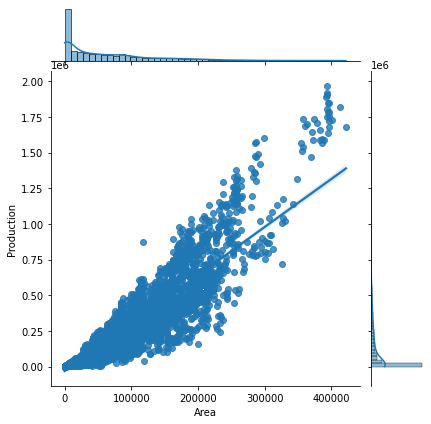

In [ ]:
sns.jointplot("Area","Production",data=wheat_data,kind="reg")
plt.xticks(rotation=90)

Wheat yield is maximum in Punjab.

# 3. COCONUT

In [ ]:
coconut_data = crop[crop["Crop"]=="Urad"]
coconut_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
75,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Urad,1.5,1.16,0.773333
125,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Rabi,Urad,1059.5,458.79,0.433025
199,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Rabi,Urad,34.0,15.05,0.442647
270,Andhra Pradesh,ANANTAPUR,1999,Kharif,Urad,4.0,2.00,0.500000
309,Andhra Pradesh,ANANTAPUR,2000,Kharif,Urad,135.0,8.00,0.059259
...,...,...,...,...,...,...,...,...
246000,West Bengal,PURULIA,2012,Kharif,Urad,9258.0,2910.00,0.314323
246011,West Bengal,PURULIA,2012,Rabi,Urad,259.0,133.00,0.513514
246033,West Bengal,PURULIA,2013,Kharif,Urad,12986.0,2877.00,0.221546
246070,West Bengal,PURULIA,2014,Kharif,Urad,11493.0,3287.00,0.286000


<AxesSubplot:xlabel='Season', ylabel='Yield'>

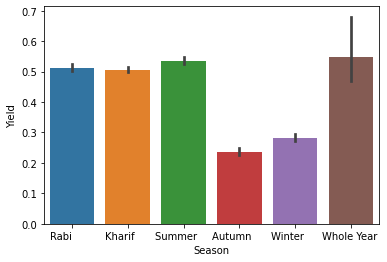

In [ ]:
sns.barplot("Season","Yield",data = coconut_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Dadra and Nagar Haveli'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Himachal Pradesh'),
  Text(10, 0, 'Jammu and Kashmir '),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Madhya Pradesh'),
  Text(13, 0, 'Maharashtra'),
  Text(14, 0, 'Mizoram'),
  Text(15, 0, 'Nagaland'),
  Text(16, 0, 'Odisha'),
  Text(17, 0, 'Puducherry'),
  Text(18, 0, 'Punjab'),
  Text(19, 0, 'Rajasthan'),
  Text(20, 0, 'Sikkim'),
  Text(21, 0, 'Tamil Nadu'),
  Text(22, 0, 'Telangana '),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Uttar Pradesh'),
  Text(25, 0, 'Uttarakhand'),
  Text(26, 0, 'West Bengal')])

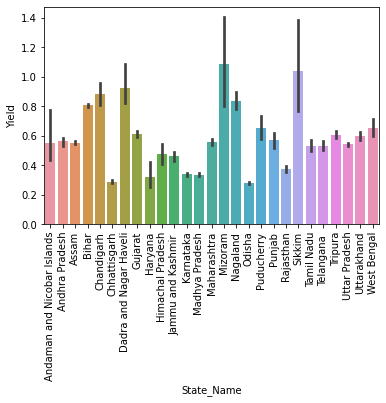

In [ ]:
sns.barplot("State_Name","Yield",data = coconut_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Dadra and Nagar Haveli'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Himachal Pradesh'),
  Text(10, 0, 'Jammu and Kashmir '),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Madhya Pradesh'),
  Text(13, 0, 'Maharashtra'),
  Text(14, 0, 'Mizoram'),
  Text(15, 0, 'Nagaland'),
  Text(16, 0, 'Odisha'),
  Text(17, 0, 'Puducherry'),
  Text(18, 0, 'Punjab'),
  Text(19, 0, 'Rajasthan'),
  Text(20, 0, 'Sikkim'),
  Text(21, 0, 'Tamil Nadu'),
  Text(22, 0, 'Telangana '),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Uttar Pradesh'),
  Text(25, 0, 'Uttarakhand'),
  Text(26, 0, 'West Bengal')])

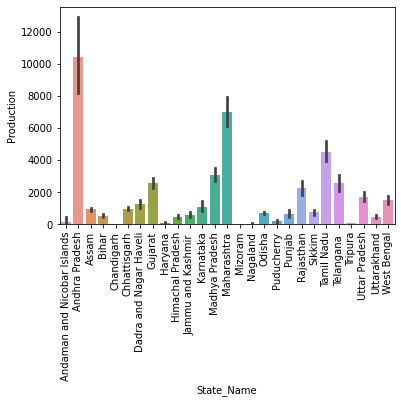

In [ ]:
sns.barplot("State_Name","Production",data = coconut_data)
plt.xticks(rotation = 90)

(array([   0., 2500., 5000.]), [])

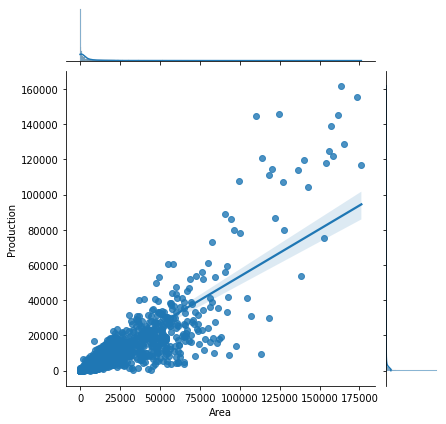

In [ ]:
sns.jointplot("Area","Production",data=coconut_data,kind="reg")
plt.xticks(rotation=90)

Observations obtained :

Andhra Pradesh is the largest producing cocnut states. Production per unit area is higher in Mizoram ans Sikkim.

# 4.MAIZE

In [ ]:
maize_data = crop[crop["Crop"]=="Maize"]
maize_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
71,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Maize,3.84,18.22,4.744792
120,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Rabi,Maize,86.70,96.40,1.111880
194,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Rabi,Maize,73.00,253.00,3.465753
212,Andhra Pradesh,ANANTAPUR,1997,Kharif,Maize,2800.00,4900.00,1.750000
226,Andhra Pradesh,ANANTAPUR,1997,Rabi,Maize,600.00,2400.00,4.000000
...,...,...,...,...,...,...,...,...
246013,West Bengal,PURULIA,2012,Summer,Maize,290.00,476.00,1.641379
246020,West Bengal,PURULIA,2013,Autumn,Maize,6189.00,10665.00,1.723219
246048,West Bengal,PURULIA,2013,Summer,Maize,325.00,522.00,1.606154
246056,West Bengal,PURULIA,2014,Autumn,Maize,6317.00,13337.00,2.111287


<AxesSubplot:xlabel='Season', ylabel='Yield'>

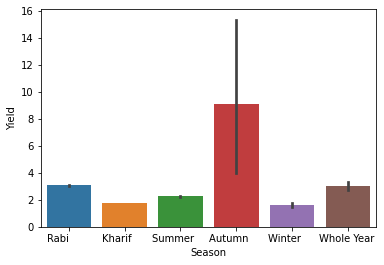

In [ ]:
sns.barplot("Season","Yield",data = maize_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Gujarat'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Himachal Pradesh'),
  Text(11, 0, 'Jammu and Kashmir '),
  Text(12, 0, 'Jharkhand'),
  Text(13, 0, 'Karnataka'),
  Text(14, 0, 'Kerala'),
  Text(15, 0, 'Madhya Pradesh'),
  Text(16, 0, 'Maharashtra'),
  Text(17, 0, 'Manipur'),
  Text(18, 0, 'Meghalaya'),
  Text(19, 0, 'Mizoram'),
  Text(20, 0, 'Nagaland'),
  Text(21, 0, 'Odisha'),
  Text(22, 0, 'Punjab'),
  Text(23, 0, 'Rajasthan'),
  Text(24, 0, 'Sikkim'),
  Text(25, 0, 'Tamil Nadu'),
  Text(26, 0, 'Telangana '),
  Text(27, 0, 'Tripura'),
  Text(28, 0, 'Uttar Pradesh'),
  Text(29,

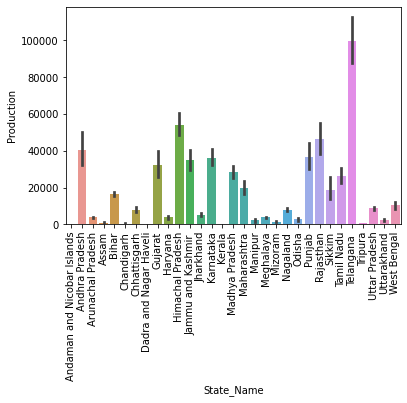

In [ ]:
sns.barplot("State_Name","Production",data = maize_data)
plt.xticks(rotation = 90)

(array([    0.,  5000., 10000.]), [])

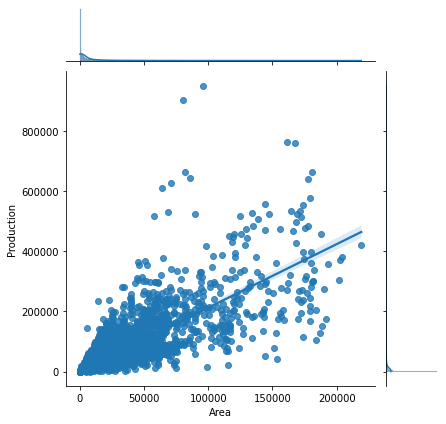

In [ ]:
sns.jointplot("Area","Production",data=maize_data,kind="reg")
plt.xticks(rotation=90)

Observations Obtained -

Maize is produced in the autumn season.

Telangana is the major maize-producing state

# 5.Arecanut Fruit

In [ ]:
Arecanut_data = crop[crop["Crop"]=='Arecanut']
Arecanut_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.00,1.594896
10,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Arecanut,1254.0,2061.00,1.643541
19,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Arecanut,1258.0,2083.00,1.655803
28,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Arecanut,1261.0,1525.00,1.209358
37,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Arecanut,1264.7,805.85,0.637187
...,...,...,...,...,...,...,...,...
245183,West Bengal,NADIA,2006,Whole Year,Arecanut,365.0,1010.00,2.767123
245222,West Bengal,NADIA,2007,Whole Year,Arecanut,358.0,982.00,2.743017
245257,West Bengal,NADIA,2008,Whole Year,Arecanut,358.0,982.00,2.743017
245686,West Bengal,PURULIA,2003,Whole Year,Arecanut,2.0,2.00,1.000000


<AxesSubplot:xlabel='Season', ylabel='Yield'>

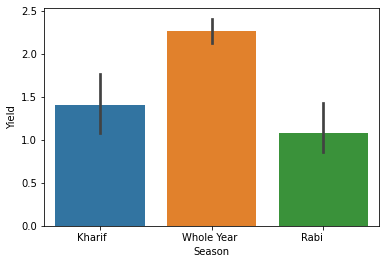

In [ ]:
sns.barplot("Season","Yield",data = Arecanut_data)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Goa'),
  Text(4, 0, 'Karnataka'),
  Text(5, 0, 'Kerala'),
  Text(6, 0, 'Meghalaya'),
  Text(7, 0, 'Puducherry'),
  Text(8, 0, 'Tamil Nadu'),
  Text(9, 0, 'West Bengal')])

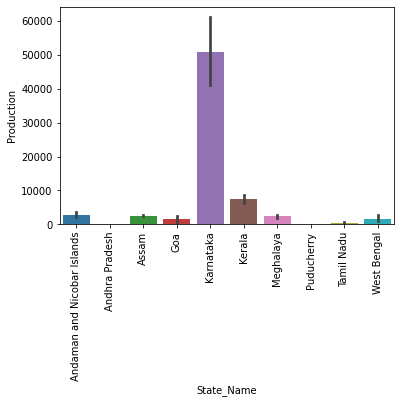

In [ ]:
sns.barplot("State_Name","Production",data = Arecanut_data)
plt.xticks(rotation = 90)

Observations Obtained -

Arecanut is produced in the Whole season.

Karnataka is the major Arecanut fruit -producing state

# 6. Sweet potatoes

In [ ]:
Sweet_potatoes_data = crop[crop["Crop"]=='Sweet potato']
Sweet_potatoes_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0,3.000000
17,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sweet potato,11.0,33.0,3.000000
61,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sweet potato,18.0,86.0,4.777778
73,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Sweet potato,22.0,208.0,9.454545
88,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2000,Whole Year,Sweet potato,78.0,843.0,10.807692
...,...,...,...,...,...,...,...,...
231451,Uttar Pradesh,VARANASI,2010,Kharif,Sweet potato,46.0,567.0,12.326087
231476,Uttar Pradesh,VARANASI,2011,Kharif,Sweet potato,21.0,273.0,13.000000
231506,Uttar Pradesh,VARANASI,2012,Kharif,Sweet potato,22.0,285.0,12.954545
231535,Uttar Pradesh,VARANASI,2013,Kharif,Sweet potato,29.0,383.0,13.206897


<AxesSubplot:xlabel='Season', ylabel='Yield'>

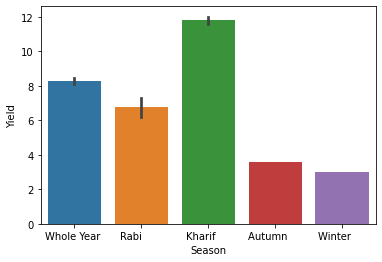

In [ ]:
sns.barplot("Season","Yield",data = Sweet_potatoes_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chhattisgarh'),
  Text(5, 0, 'Haryana'),
  Text(6, 0, 'Karnataka'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Madhya Pradesh'),
  Text(9, 0, 'Manipur'),
  Text(10, 0, 'Meghalaya'),
  Text(11, 0, 'Nagaland'),
  Text(12, 0, 'Odisha'),
  Text(13, 0, 'Puducherry'),
  Text(14, 0, 'Rajasthan'),
  Text(15, 0, 'Tamil Nadu'),
  Text(16, 0, 'Telangana '),
  Text(17, 0, 'Uttar Pradesh')])

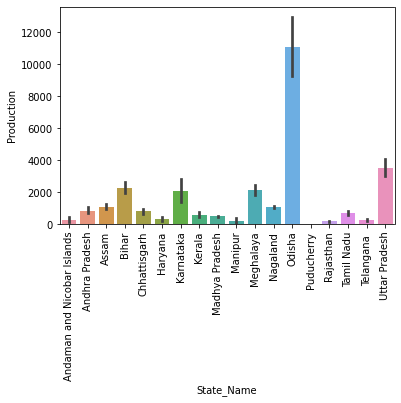

In [ ]:
sns.barplot("State_Name","Production",data = Sweet_potatoes_data)
plt.xticks(rotation = 90)

Observations Obtained -

Sweet POtatoes is produced in the Kharif season.

Odisha is the major Sweet potatoes -producing state

In [ ]:
dummy= pd.get_dummies(crop)
dummy

,Crop_Year,Area,Production,Yield,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,2000,1254.0,2000.0,1.594896,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,2.0,1.0,0.500000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000,102.0,321.0,3.147059,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,176.0,641.0,3.642045,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,720.0,165.0,0.229167,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,2014,306.0,801.0,2.617647,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246087,2014,627.0,463.0,0.738437,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246088,2014,324.0,16250.0,50.154321,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246089,2014,279151.0,597899.0,2.141848,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (181770, 811)
x_test : (60591, 811)
y_train : (181770,)
y_test : (60591,)


In [ ]:
print(x_train)
print(y_train)

        Crop_Year    Area  State_Name_Andaman and Nicobar Islands  \
201072       2013    16.0                                       0   
191897       1998  5400.0                                       0   
43814        2000  2968.0                                       0   
32815        2013   211.0                                       0   
62249        2006  1700.0                                       0   
...           ...     ...                                     ...   
236131       2000   207.0                                       0   
127145       2007    39.0                                       0   
20536        2005    43.0                                       0   
18709        2011  2489.0                                       0   
35767        1999    67.0                                       0   

        State_Name_Andhra Pradesh  State_Name_Arunachal Pradesh  \
201072                          0                             0   
191897                          0    

# Linear Regression

In [ ]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Predicting the test Results

lr_predict = model.predict(x_test)
lr_predict

array([ -151041.00065115,   484635.06344566, -1265373.63884979, ...,
         142583.14555401, -1739172.58147887,   284797.52886551])

In [ ]:
model.score(x_test,y_test)

0.17832914323757543

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.17832914323757543


Text(0.5, 1.0, 'Linear Regression')

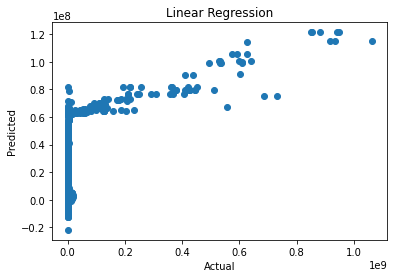

In [ ]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Clearly, the dataset is not good for linear regression.

Assumptions of Linear Regression

Linearity.

Homoscedasticity

Multivariate normality

Lack of multicollinearity

# Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)
rf_predict

array([ 4902.45454545,   627.81818182,  2174.63636364, ...,
         216.45454545, 12510.54545455,   100.        ])

In [ ]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.9649853249819902


In [ ]:
# Calculating Adj. R2 score:

Adjr2_1 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.16718183289724975


Text(0.5, 1.0, 'Random Forest Regression')

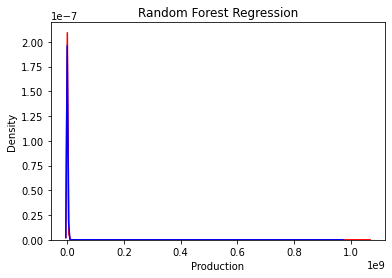

In [ ]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

# SECTION 3

# FERTILIZER RECOMMENDATION

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the downloaded dataset
path = r"/content/Fertilizer Prediction.csv"
df = pd.read_csv(path)

# rename target column
df = df.rename({'Fertilizer Name': 'Fertilizer','Crop Type': 'Crop_Type','Soil Type': 'Soil_Type'}, axis=1)

df.sample(15)

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
78,26,52,36,Clayey,Pulses,7,16,20,10-26-26
90,30,60,26,Black,Oil seeds,8,9,30,14-35-14
19,29,58,52,Loamy,Wheat,13,0,36,DAP
48,30,60,29,Red,Ground Nuts,41,0,0,Urea
2,34,65,62,Black,Cotton,7,9,30,14-35-14
73,27,53,34,Black,Oil seeds,42,0,0,Urea
22,35,68,33,Red,Tobacco,11,0,37,DAP
43,34,65,60,Black,Sugarcane,35,0,0,Urea
23,28,54,37,Black,Millets,36,0,0,Urea
92,36,68,41,Red,Ground Nuts,41,0,0,Urea


In [ ]:

print("SHAPE : ", df.shape)
df.info()

SHAPE :  (99, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temparature  99 non-null     int64 
 1   Humidity     99 non-null     int64 
 2   Moisture     99 non-null     int64 
 3   Soil_Type    99 non-null     object
 4   Crop_Type    99 non-null     object
 5   Nitrogen     99 non-null     int64 
 6   Potassium    99 non-null     int64 
 7   Phosphorous  99 non-null     int64 
 8   Fertilizer   99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [ ]:
df.describe()


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [ ]:
# Printing number of samples per each class
df["Fertilizer"].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer, dtype: int64

# Analyze Independent Variables

In [ ]:

# list of all numerical variables in dataset
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features), numerical_features)

# list of all discrete variables in dataset
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print('Number of Discrete variables: ', len(discrete_features), discrete_features)

# list of all continuous variables in dataset
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print('Number of Continuous variables: ', len(continuous_features), continuous_features)

# list of all categorical variables in dataset
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of categorical variables: ', len(categorical_features), categorical_features)


Number of numerical variables:  6 ['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
Number of Discrete variables:  4 ['Temparature', 'Humidity ', 'Nitrogen', 'Potassium']
Number of Continuous variables:  2 ['Moisture', 'Phosphorous']
Number of categorical variables:  3 ['Soil_Type', 'Crop_Type', 'Fertilizer']


In [ ]:
# Find the Cardinality i.e number of categories in each categorical feature
for feature in categorical_features:
    if feature=='Fertilizer':
      pass
    print('The feature is {} and no. of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Soil_Type and no. of categories are 5
The feature is Crop_Type and no. of categories are 11
The feature is Fertilizer and no. of categories are 7


# One-Hot Encoding the Categorical Variables

In [ ]:
# list of categorical features in dataset
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

# Remove the Target variable.
categorical_features.remove('Fertilizer')

# encode categorical features
new_encoded_columns = pd.get_dummies(df[categorical_features])

# Concatinating with original dataframe
df = pd.concat([df,new_encoded_columns],axis="columns")

# dropping the categorical variables since they are redundant now.
df = df.drop(categorical_features,axis="columns")

In [ ]:

df.head(10)


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer,Soil_Type_Black,Soil_Type_Clayey,Soil_Type_Loamy,...,Crop_Type_Cotton,Crop_Type_Ground Nuts,Crop_Type_Maize,Crop_Type_Millets,Crop_Type_Oil seeds,Crop_Type_Paddy,Crop_Type_Pulses,Crop_Type_Sugarcane,Crop_Type_Tobacco,Crop_Type_Wheat
0,26,52,38,37,0,0,Urea,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29,52,45,12,0,36,DAP,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,34,65,62,7,9,30,14-35-14,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32,62,34,22,0,20,28-28,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,54,46,35,0,0,Urea,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5,26,52,35,12,10,13,17-17-17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,25,50,64,9,0,10,20-20,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,33,64,50,41,0,0,Urea,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,30,60,42,21,0,18,28-28,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,29,58,33,9,7,30,14-35-14,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Training the Model

In [ ]:

x = df.drop("Fertilizer",axis=1)
x.head(10)

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Type_Black,Soil_Type_Clayey,Soil_Type_Loamy,Soil_Type_Red,...,Crop_Type_Cotton,Crop_Type_Ground Nuts,Crop_Type_Maize,Crop_Type_Millets,Crop_Type_Oil seeds,Crop_Type_Paddy,Crop_Type_Pulses,Crop_Type_Sugarcane,Crop_Type_Tobacco,Crop_Type_Wheat
0,26,52,38,37,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29,52,45,12,0,36,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,34,65,62,7,9,30,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32,62,34,22,0,20,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,28,54,46,35,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,26,52,35,12,10,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,25,50,64,9,0,10,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
7,33,64,50,41,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,30,60,42,21,0,18,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,29,58,33,9,7,30,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
print("Columns : ", x.columns)
x.info()

Columns :  Index(['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Soil_Type_Black', 'Soil_Type_Clayey', 'Soil_Type_Loamy',
       'Soil_Type_Red', 'Soil_Type_Sandy', 'Crop_Type_Barley',
       'Crop_Type_Cotton', 'Crop_Type_Ground Nuts', 'Crop_Type_Maize',
       'Crop_Type_Millets', 'Crop_Type_Oil seeds', 'Crop_Type_Paddy',
       'Crop_Type_Pulses', 'Crop_Type_Sugarcane', 'Crop_Type_Tobacco',
       'Crop_Type_Wheat'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Temparature            99 non-null     int64
 1   Humidity               99 non-null     int64
 2   Moisture               99 non-null     int64
 3   Nitrogen               99 non-null     int64
 4   Potassium              99 non-null     int64
 5   Phosphorous            99 non-null     int64
 6   Soil_

In [ ]:

y = df["Fertilizer"]
y.head(10)


0        Urea
1         DAP
2    14-35-14
3       28-28
4        Urea
5    17-17-17
6       20-20
7        Urea
8       28-28
9    14-35-14
Name: Fertilizer, dtype: object

# Data Splitting

In [ ]:

# DATA SPLITTING
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,shuffle=True)


In [ ]:

x_train.values[:10]

array([[30, 60, 29, 41,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0],
       [29, 58, 33,  9,  7, 30,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0],
       [28, 54, 41, 36,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0],
       [33, 64, 50, 41,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1],
       [34, 65, 45,  6, 19, 21,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0],
       [30, 60, 27, 12,  0, 40,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0],
       [36, 68, 41, 41,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0],
       [30, 60, 49, 13,  0,  9,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1],
       [30, 60, 47, 22,  0, 21,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0],
       [27, 53, 59, 10,  0, 15,  0,  0,  1,  0,  0,  0,

In [ ]:

y_train.values[:10]


array(['Urea', '14-35-14', 'Urea', 'Urea', '10-26-26', 'DAP', 'Urea',
       '20-20', '28-28', '20-20'], dtype=object)

# LightGBM Classifier Model

In [ ]:

# Creating a lightgbm model
import lightgbm as lgb

model = lgb.LGBMClassifier()

# Training the model using Training Data
model.fit(x_train,y_train)

LGBMClassifier()

In [ ]:
model.score(x_test, y_test)

0.9

In [ ]:

# Make Prediction
output = model.predict([[27, 54, 28, 13,  0, 40,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  1,  0,  0  ,0]])
print("Predicted Fertilizer : ",output[0])

Predicted Fertilizer :  DAP


# Input Function

In [ ]:
import numpy as np

def get_input(x):


    # Index values of each variable in x
    x_structure = {
        "Temparature": 0, "Humidity": 1, "Moisture": 2, "Nitrogen": 3,
        "Potassium": 4, "Phosphorous": 5, "Black": 6,  "Clayey": 7, "Loamy": 8,
        "Red": 9, "Sandy": 10, "Barley": 11, "Cotton": 12, "Ground Nuts": 13, "Maize": 14,
        "Millets": 15, "Oil seeds": 16, "Paddy": 17, "Pulses": 18, "Sugarcane": 19, "Tobacco": 20,
        "Wheat": 21
    }

    output = np.zeros(len(x_structure))
    output[0] = x[0]
    output[1] = x[1]
    output[2] = x[2]
    output[3] = x[3]
    output[4] = x[4]
    output[5] = x[5]
    output[x_structure[x[6]]] = 1
    output[x_structure[x[7]]] = 1
    return output


input_x = get_input([27, 54, 28	, 13	, 0	, 40, "Clayey", "Pulses"])
input_x

array([27., 54., 28., 13.,  0., 40.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [ ]:
# Make Prediction
x1 = get_input([27, 54, 28	, 13	, 0	, 40, "Clayey", "Pulses"])

y1 = model.predict([x1])
print("Predicted Fertilizer : ",y1[0])

Predicted Fertilizer :  DAP


In [ ]:
# Make Prediction
x1 = get_input([34, 84, 38	, 63	, 45, 90, "Red", "Wheat"])

y1 = model.predict([x1])
print("Predicted Fertilizer : ",y1[0])

Predicted Fertilizer :  28-28


In [ ]:
y = df['Fertilizer'].copy()
X = df.drop('Fertilizer', axis=1).copy()

In [ ]:
y = df['Fertilizer'].copy()
X = df.drop('Fertilizer', axis=1).copy()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X[0]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., 26., 52., 38., 37.,  0.,  0.])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[0]

array([-0.48412292, -0.50395263, -0.54321448, -0.48412292,  2.06559112,
       -0.25993762, -0.33567254, -0.31180478,  4.33012702, -0.38069349,
       -0.25993762, -0.33567254, -0.33567254, -0.42320737, -0.23094011,
       -0.33567254,  0.76462082,  0.80219471,  0.71373089, -1.15292671,
        0.91259936,  0.80677787])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[0]

array([-0.48412292, -0.50395263, -0.54321448, -0.48412292,  2.06559112,
       -0.25993762, -0.33567254, -0.31180478,  4.33012702, -0.38069349,
       -0.25993762, -0.33567254, -0.33567254, -0.42320737, -0.23094011,
       -0.33567254,  0.76462082,  0.80219471,  0.71373089, -1.15292671,
        0.91259936,  0.80677787])

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(classifier, X_test,y_test, cv=5).mean()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.8

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 6]]


0.95

In [ ]:
classifier.score(X_test, y_test)

0.95

In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Fertilizer',axis=1),df['Fertilizer'],test_size=0.2,random_state=42)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 8), y_train = (79,), x_test = (20, 8), y_test = (20,)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

rand = RandomForestClassifier(max_depth=3)
classifier.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(rand, X_test,y_test, cv=5).mean()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.75

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)

pred_KN = neigh.predict(X_test)

print(classification_report(y_test,pred_KN))

              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         2
    14-35-14       0.00      0.00      0.00         1
       20-20       0.00      0.00      0.00         1
       28-28       0.20      0.20      0.20         5
         DAP       0.00      0.00      0.00         5
        Urea       1.00      0.17      0.29         6

    accuracy                           0.10        20
   macro avg       0.20      0.06      0.08        20
weighted avg       0.35      0.10      0.14        20



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cross_val_score(neigh, X_test,y_test, cv=5).mean()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.35

In [ ]:
neigh.score(X_test, y_test)

0.1

# Gradient Search

In [ ]:
from sklearn.model_selection import GridSearchCV

#params = {
#    'n_estimators':[300,400,500],
#    'max_depth':[5,10,15],
#    'min_samples_split':[2,5,8]
#}
#grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand = RandomForestClassifier(max_depth= 5, min_samples_split= 2, n_estimators= 300)

grid_rand.fit(X_train,y_train)

pred_rand = grid_rand.predict(X_test)

print(classification_report(y_test,pred_rand))

              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
scores = cross_val_score(grid_rand, X_test,y_test, cv=5)

print(scores.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.75


In [ ]:
grid_rand.score(X_test, y_test)

0.95